In [1]:
import pandas as pd #Import pandas
import sys #Determine Python version number

 Pandas and python version

In [2]:
print('Python version' + sys.version)
print('Pandas version' + pd.__version__)

Python version3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
Pandas version1.4.4


Read CSV File

In [3]:
customerorders = pd.read_csv('casestudy.csv')

Copy to new df, so that the changes wont affect the original df

In [4]:
df = customerorders.copy()

Check variable data types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685927 entries, 0 to 685926
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      685927 non-null  int64  
 1   customer_email  685927 non-null  object 
 2   net_revenue     685927 non-null  float64
 3   year            685927 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 20.9+ MB


Ckeck for missing values

In [6]:
df.isnull().sum()

Unnamed: 0        0
customer_email    0
net_revenue       0
year              0
dtype: int64

Display the first rows of df

In [7]:
df.head()

,Unnamed: 0,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015


In [8]:
df.groupby(['year'])['net_revenue'].sum()

year
2015    29036749.19
2016    25730943.59
2017    31417495.03
Name: net_revenue, dtype: float64

Create new df for each year

In [9]:
yr2015 = df.loc[df['year'] == 2015 ]

In [10]:
yr2016 = df.loc[df['year'] == 2016 ]

In [11]:
yr2017 = df.loc[df['year'] == 2017 ]

•	Total revenue for the current year

Split the df in three, one for every year

In [12]:
yr2015['net_revenue'].sum()

29036749.189999994

In [13]:
yr2016['net_revenue'].sum()

25730943.59

In [14]:
yr2017['net_revenue'].sum()

31417495.030000016

•	New Customer Revenue e.g. new customers not present in previous year only

Create a list with the existing customers email in order to find the new customers

In [15]:
customers_list_2015 =  yr2015['customer_email'].to_numpy()
print(customers_list_2015)

[' nhknapwsbx@gmail.com' 'joiuzbvcpn@gmail.com' 'ukkjctepxt@gmail.com' ...
 ' vanasezjpw@gmail.com' 'dnpremlztb@gmail.com' 'qsgswrpycl@gmail.com']


In [16]:
new_customers_2016 = yr2016[~yr2016['customer_email'].isin(customers_list_2015)]

In [17]:
new_customers_2016_revenue = new_customers_2016['net_revenue'].sum()

In [18]:
new_customers_2016_revenue

18245491.01

In [19]:
customers_list_2016 =  yr2016['customer_email'].to_numpy()
print(customers_list_2016)

[' mwrossuukz@gmail.com' 'gkwsoupawk@gmail.com' 'vlyigtgfzs@gmail.com' ...
 'fkweqlmmjw@gmail.com' 'pidugzoeej@gmail.com' ' kxqglfdktu@gmail.com']


In [20]:
new_customers_2017 = yr2017[~yr2017['customer_email'].isin(customers_list_2016)]

In [21]:
new_customers_2017_revenue = new_customers_2017['net_revenue'].sum()

In [22]:
new_customers_2017_revenue

28776235.039999995

•	Existing Customer Growth. To calculate this, use the Revenue of existing customers for current year –(minus) Revenue of existing customers from the previous year

the revenue of existing customers for curent year is the same as the total year revenue

For the year 2016: The Existing Customer Growth = 2016 Revenue - 2015 Revenue

In [23]:
existing_customer_growth_2016 = (yr2016['net_revenue'].sum()) - (yr2015['net_revenue'].sum())

In [24]:
existing_customer_growth_2016

-3305805.599999994

For 2017:

In [25]:
existing_customer_growth_2017 = (yr2017['net_revenue'].sum()) - (yr2016['net_revenue'].sum())

In [26]:
existing_customer_growth_2017

5686551.440000016

•	Revenue lost from attrition

•	Existing Customer Revenue Current Year

Calculate for each Customer the Revenue for the Current Year

For 2015:

In [34]:
yr2015.groupby('customer_email')['net_revenue'].sum()

customer_email
 aaagldjgdt@gmail.com     44.72
 aaaicvtnzx@gmail.com     49.20
 aaaihliwuo@gmail.com    248.67
 aaaqpobaaa@gmail.com    126.83
 aaatyrafec@gmail.com     65.28
                          ...  
zzzcdrueqb@gmail.com      55.99
zzzjhxjwic@gmail.com      72.11
zzzrjsowtl@gmail.com      95.80
zzztwcvgvp@gmail.com     129.75
zzzxxclrua@gmail.com      57.24
Name: net_revenue, Length: 231294, dtype: float64

In [35]:
existing_customers_2015 = yr2015[yr2015['customer_email'].isin(customers_list_2015)]

In [36]:
existing_customers_2015_revenue = existing_customers_2015['net_revenue'].sum()

In [37]:
existing_customers_2015_revenue

29036749.189999994

For 2016:

In [28]:
yr2016.groupby('customer_email')['net_revenue'].sum()

customer_email
 aaafxtkgxo@gmail.com    127.62
 aaaglfuvti@gmail.com    160.79
 aaaqpobaaa@gmail.com    109.50
 aaatizazdz@gmail.com     51.17
 aaatyrafec@gmail.com     45.53
                          ...  
zzxqawadmp@gmail.com      48.06
zzylxsttdq@gmail.com      75.16
zzysesrqck@gmail.com     195.33
zzyyqigvjs@gmail.com      25.37
zzzwmlwwmn@gmail.com      98.01
Name: net_revenue, Length: 204646, dtype: float64

In [38]:
existing_customers_2016 = yr2016[yr2016['customer_email'].isin(customers_list_2016)]

In [39]:
existing_customers_2016_revenue = existing_customers_2016['net_revenue'].sum()

In [40]:
existing_customers_2016_revenue

25730943.59

For 2017:

In [43]:
customers_list_2017 =  yr2017['customer_email'].to_numpy()
print(customers_list_2017)

['mwrossuukz@gmail.com' 'qvjfterwnk@gmail.com ' ' vlyigtgfzs@gmail.com'
 ... 'appaplmgko@gmail.com' 'wvkpmwsgck@gmail.com' ' aregboumbw@gmail.com']


In [44]:
yr2017.groupby('customer_email')['net_revenue'].sum()

customer_email
 aaaiekepot@gmail.com     43.68
 aaampblnzo@gmail.com     96.51
 aaanfhekoc@gmail.com     73.36
 aaaotqrjqh@gmail.com    181.06
 aaapzlizsp@gmail.com    247.56
                          ...  
zzzdnukepj@gmail.com      81.99
zzzeehgitl@gmail.com      65.98
zzzmkaruhf@gmail.com     202.77
zzznqseiwv@gmail.com     162.24
zzzoxtrfic@gmail.com      15.74
Name: net_revenue, Length: 249987, dtype: float64

In [45]:
existing_customers_2017 = yr2017[yr2017['customer_email'].isin(customers_list_2017)]

In [46]:
existing_customers_2017_revenue = existing_customers_2017['net_revenue'].sum()

In [47]:
existing_customers_2017_revenue

31417495.030000016

•	Existing Customer Revenue Prior Year

For 2016:

In [48]:
existing_customers_2016_prior = yr2015[yr2015['customer_email'].isin(customers_list_2016)]

In [49]:
existing_customers_2016_prior_revenue = existing_customers_2016_prior['net_revenue'].sum()

In [50]:
existing_customers_2016_prior_revenue

7465117.12

For 2017:

In [51]:
existing_customers_2017_prior = yr2016[yr2016['customer_email'].isin(customers_list_2017)]

In [52]:
existing_customers_2017_prior_revenue = existing_customers_2017_prior['net_revenue'].sum()

In [53]:
existing_customers_2017_prior_revenue

2620648.65

•	Total Customers Current Year

For 2015:

In [55]:
yr2015.groupby('customer_email').count()

,Unnamed: 0,net_revenue,year
customer_email,,,
aaagldjgdt@gmail.com,1,1,1
aaaicvtnzx@gmail.com,1,1,1
aaaihliwuo@gmail.com,1,1,1
aaaqpobaaa@gmail.com,1,1,1
aaatyrafec@gmail.com,1,1,1
...,...,...,...
zzzcdrueqb@gmail.com,1,1,1
zzzjhxjwic@gmail.com,1,1,1
zzzrjsowtl@gmail.com,1,1,1


For 2016:

In [56]:
yr2016.groupby('customer_email').count()

,Unnamed: 0,net_revenue,year
customer_email,,,
aaafxtkgxo@gmail.com,1,1,1
aaaglfuvti@gmail.com,1,1,1
aaaqpobaaa@gmail.com,1,1,1
aaatizazdz@gmail.com,1,1,1
aaatyrafec@gmail.com,1,1,1
...,...,...,...
zzxqawadmp@gmail.com,1,1,1
zzylxsttdq@gmail.com,1,1,1
zzysesrqck@gmail.com,1,1,1


For 2017:

In [58]:
yr2017.groupby('customer_email').count()

,Unnamed: 0,net_revenue,year
customer_email,,,
aaaiekepot@gmail.com,1,1,1
aaampblnzo@gmail.com,1,1,1
aaanfhekoc@gmail.com,1,1,1
aaaotqrjqh@gmail.com,1,1,1
aaapzlizsp@gmail.com,1,1,1
...,...,...,...
zzzdnukepj@gmail.com,1,1,1
zzzeehgitl@gmail.com,1,1,1
zzzmkaruhf@gmail.com,1,1,1


•	New Customers

For 2016:

In [59]:
new_customers_2016 = yr2016[~yr2016['customer_email'].isin(customers_list_2015)]

In [60]:
new_customers_2016

,Unnamed: 0,customer_email,net_revenue,year
231294,231294,mwrossuukz@gmail.com,197.26,2016
231295,231295,gkwsoupawk@gmail.com,38.28,2016
231296,231296,vlyigtgfzs@gmail.com,154.57,2016
231297,231297,yfirychuhk@gmail.com,102.47,2016
231298,231298,trnzgqinuu@gmail.com,32.03,2016
...,...,...,...,...
435933,435933,sqodpufunf@gmail.com,29.62,2016
435934,435934,dcakqgznnm@gmail.com,146.47,2016
435936,435936,rdotspqdxi@gmail.com,169.79,2016
435937,435937,fkweqlmmjw@gmail.com,79.71,2016


For 2017:

In [61]:
new_customers_2017 = yr2017[~yr2017['customer_email'].isin(customers_list_2016)]

In [62]:
new_customers_2017

,Unnamed: 0,customer_email,net_revenue,year
435940,435940,mwrossuukz@gmail.com,96.61,2017
435941,435941,qvjfterwnk@gmail.com,176.00,2017
435942,435942,vlyigtgfzs@gmail.com,73.47,2017
435943,435943,yfirychuhk@gmail.com,138.17,2017
435944,435944,fdkiioqtli@gmail.com,156.87,2017
...,...,...,...,...
685922,685922,qzqttwiftu@gmail.com,184.58,2017
685923,685923,pjodiifjop@gmail.com,133.03,2017
685924,685924,appaplmgko@gmail.com,200.98,2017
685925,685925,wvkpmwsgck@gmail.com,235.35,2017


•	Lost Customers

For 2016:

In [67]:
lost_customers_2016 = yr2015[~yr2015['customer_email'].isin(customers_list_2016)]

In [68]:
lost_customers_2016

,Unnamed: 0,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015
...,...,...,...,...
231289,231289,xtrpmgjbwp@gmail.com,216.89,2015
231290,231290,peeorxpsbr@gmail.com,39.16,2015
231291,231291,vanasezjpw@gmail.com,233.46,2015
231292,231292,dnpremlztb@gmail.com,136.27,2015


For 2017:

In [65]:
lost_customers_2017 = yr2016[~yr2016['customer_email'].isin(customers_list_2017)]

In [66]:
lost_customers_2017

,Unnamed: 0,customer_email,net_revenue,year
231294,231294,mwrossuukz@gmail.com,197.26,2016
231295,231295,gkwsoupawk@gmail.com,38.28,2016
231296,231296,vlyigtgfzs@gmail.com,154.57,2016
231297,231297,yfirychuhk@gmail.com,102.47,2016
231298,231298,trnzgqinuu@gmail.com,32.03,2016
...,...,...,...,...
435933,435933,sqodpufunf@gmail.com,29.62,2016
435935,435935,mezrjfkced@gmail.com,114.17,2016
435936,435936,rdotspqdxi@gmail.com,169.79,2016
435938,435938,pidugzoeej@gmail.com,116.80,2016


Year with the most orders

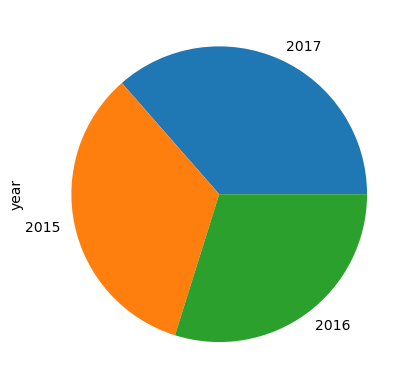

In [69]:
YMO=df['year'].value_counts().plot(kind='pie')

Customers with the most orders

<AxesSubplot:xlabel='customer_email'>

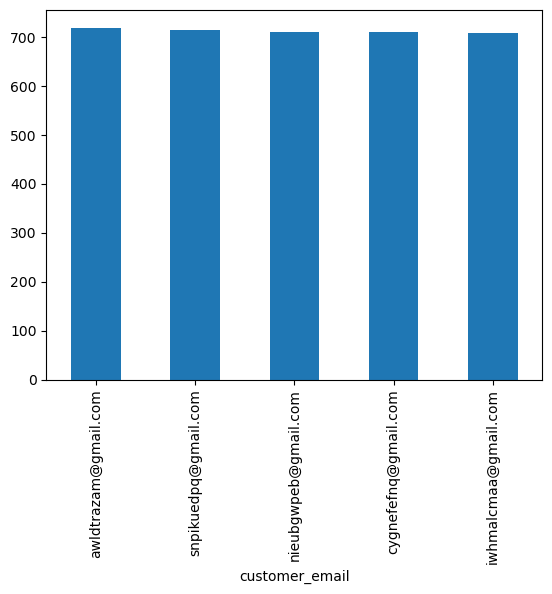

In [76]:
best_customers = df.groupby(['customer_email'])['net_revenue'].sum().sort_values(ascending=False)
best_customers.head(5).plot(kind = 'bar')

Average Year Revenue

<AxesSubplot:xlabel='year'>

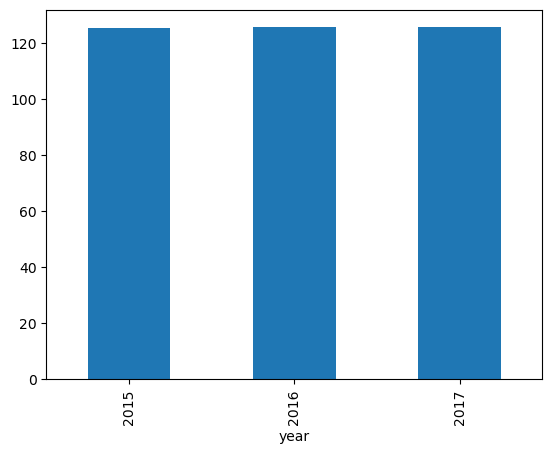

In [79]:
avg_df = df.groupby('year')['net_revenue'].mean()
avg_df.plot(kind="bar")